In [1]:

!pip install nltk scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:

df = pd.read_csv("spam.csv",encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['message'].apply(clean_text)

In [16]:
from sklearn.model_selection import train_test_split

X = df['cleaned']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Count
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

In [19]:
print("Results using CountVectorizer:\n")

for name, model in models.items():
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*50)

Results using CountVectorizer:

Model: Naive Bayes
Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
Model: SVM
Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0 

In [20]:
print("Results using TF-IDF:\n")

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-"*50)

Results using TF-IDF:

Model: Naive Bayes
Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9497757847533632
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115

--------------------------------------------------
Model: SVM
Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.98

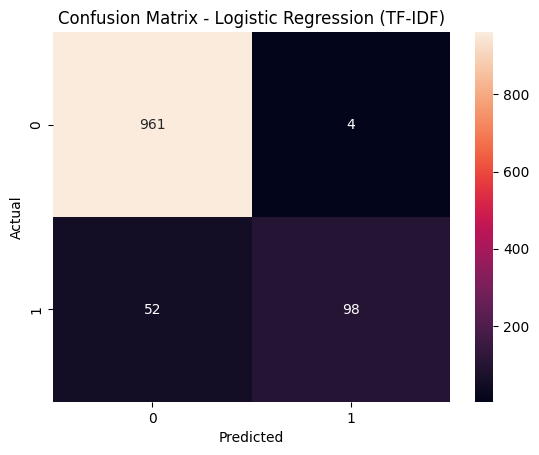

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

In [22]:
results = []

for vectorizer_name, X_tr, X_te in [
    ("Count", X_train_count, X_test_count),
    ("TF-IDF", X_train_tfidf, X_test_tfidf)
]:
    for name, model in models.items():
        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)
        acc = accuracy_score(y_test, y_pred)
        results.append([vectorizer_name, name, acc])

results_df = pd.DataFrame(results, columns=["Vectorizer", "Model", "Accuracy"])
results_df

,Vectorizer,Model,Accuracy
0,Count,Naive Bayes,0.980269
1,Count,Logistic Regression,0.976682
2,Count,SVM,0.973991
3,TF-IDF,Naive Bayes,0.968610
4,TF-IDF,Logistic Regression,0.949776
5,TF-IDF,SVM,0.977578


In [23]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_spam = coefficients.argsort()[-10:]
top_ham = coefficients.argsort()[:10]

print("Top Spam Words:")
for i in top_spam:
    print(feature_names[i])

print("\nTop Ham Words:")
for i in top_ham:
    print(feature_names[i])

Top Spam Words:
prize
new
urgent
ringtone
service
pmin
stop
mobile
claim
txt

Top Ham Words:
sir
ltgt
ill
hey
happy
bus
princess
way
morning
said
